In [243]:
import pandas as pd
import numpy as np
import seaborn as sns 

from numpy.random import randn

from pandas import DataFrame, Series

from bb_binary import Repository, convert_frame_to_numpy, load_frame_container

# Import the stats librayr from numpy
from scipy import stats

# These are the plotting modules adn libraries we'll use:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [244]:
base = "../00_Data/testset_2015_1h/"
folder0 = "2015082215"
folder1 = "2015092215"
folder2 = "2015102215"
folder_list = [folder0, folder1, folder2]

In [249]:
# Plotten der Histogramme pro Kamera (Verteilung der Detections)
def plot_det_per_cam(repo, sample):
    frames = list(repo.iter_frames())
    
    # Liste mir FrameInfos generieren
    frame_list = []
    for f,c in frames:
        frame_list.append({'f_idx': f.frameIdx,
                           'f_timestamp': f.timestamp,
                           'f_detections': len(f.detectionsUnion.detectionsDP),
                           'c_id': c.id,
                           'c_cam_id': c.camId
                           })
    # DataFrame draus machen
    df = DataFrame(frame_list)
    
    plt.figure()
    
    for i in range(4):
        dataset1 = df[df.c_cam_id == i].f_detections

        #Plot a histogram of the dataset, note bins=10 by default
        t = "Detections per Camera for " + sample + " (1 hour)"
        ax = dataset1.plot.hist(alpha=0.7, bins=10, title=t)
        ax.set_xlabel("Number of Detections")
        ax.set_ylabel("Number of Frames (Frequency)")
        
    plt.savefig("plots/det_per_cam_1h_{}".format(sample))

In [250]:
# Plotten der Veteilung insgesamt

In [251]:
def plot_det_total(repo, sample):
    
    cam0 = list(repo.iter_fnames(cam=0))[0]
    cam1 = list(repo.iter_fnames(cam=1))[0]
    cam2 = list(repo.iter_fnames(cam=2))[0]
    cam3 = list(repo.iter_fnames(cam=3))[0]

    files = [cam0, cam1, cam2, cam3]

    df = DataFrame()

    # Für jede Datei die Frames einlesen und an DataFrame anhängen
    for f in files:

        # id - ID des FrameContainers
        # frameIdx - ID von einem Frame: 0 - 1023

        fc = load_frame_container(f)

        frame_list = []
        for f in fc.frames:
            frame_list.append({'detections': len(f.detectionsUnion.detectionsDP),
                             'frame_idx': f.frameIdx,
                             'fc_id': fc.id,
                             'cam_id': fc.camId
                              })

        det = DataFrame(frame_list)
        df = pd.concat([df, det], axis=1)
    
    # Summe aller detections berechnen
    df['sum_det'] = df.detections.sum(axis=1)
    
    plt.figure()
    
    t = "Detections in total for " + sample + " (6 minutes)"
    ax = df.sum_det.plot.box(title=t)
    ax.set_ylabel("Number of Detections")
    plt.savefig("plots/det_total_6m_{}".format(sample))

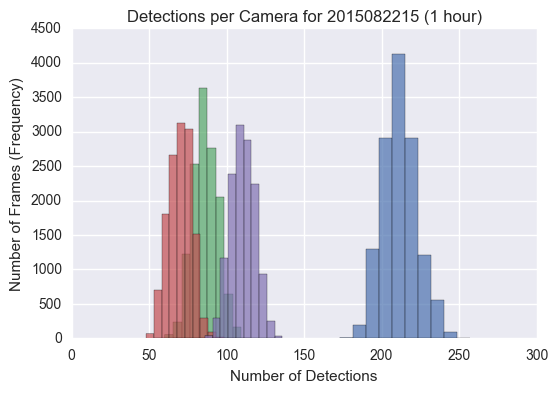

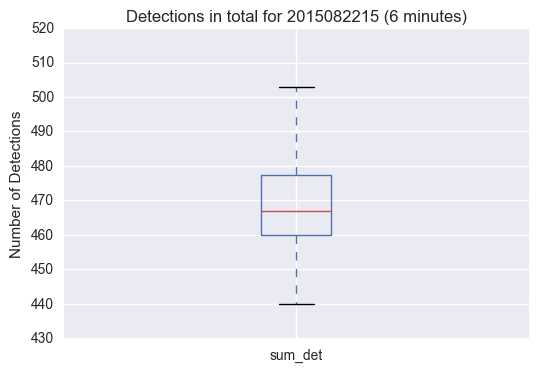

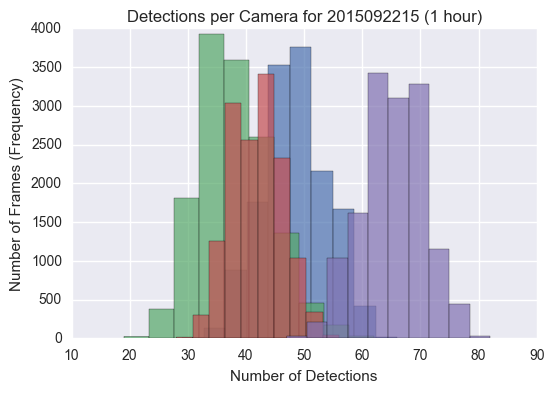

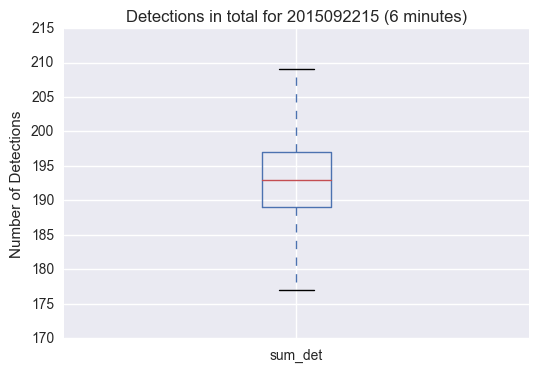

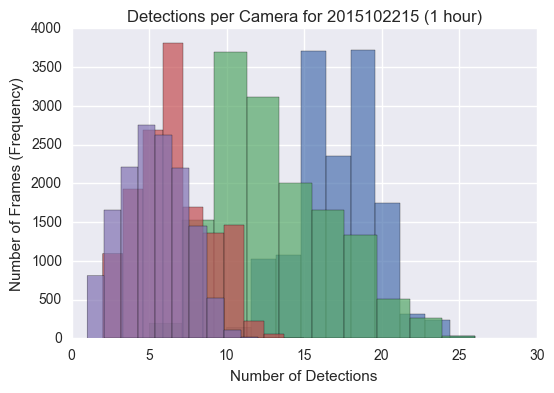

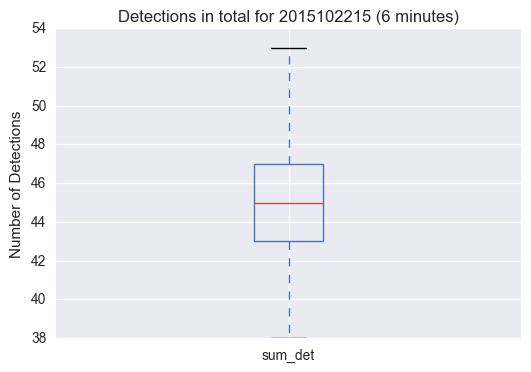

In [252]:
for p in path_list:
    r = Repository(base+p)
    plot_det_per_cam(r,p)
    plot_det_total(r,p)